<a href="https://colab.research.google.com/github/imsunokdir/PupperVision/blob/main/PupperVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print('TF:', tf.__version__)
print('TF Hub Version: ',hub.__version__)

# Check for GPU availability
print('GPU','available (YESSSS!!!)' if tf.config.list_physical_devices('GPU') else 'not available')

TF: 2.8.2
TF Hub Version:  0.12.0
GPU available (YESSSS!!!)


## The Dataset is from kaggle
### https://www.kaggle.com/competitions/dog-breed-identification/data

In [ ]:
#!unzip 'drive/MyDrive/Dog Vision/archive.zip' -d 'drive/MyDrive/Dog Vision'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print('TF Version:', tf.__version__)
print('TF Hub Version:', hub.__version__)

TF Version: 2.8.2


In [ ]:
print('GPU', 'Available :)' if tf.config.list_physical_devices('GPU') else 'Not Available :(')

GPU Available :)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
labels_csv = pd.read_csv('drive/MyDrive/Dog Vision/labels.csv')

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [ ]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
labels_csv.isna().sum()

id       0
breed    0
dtype: int64

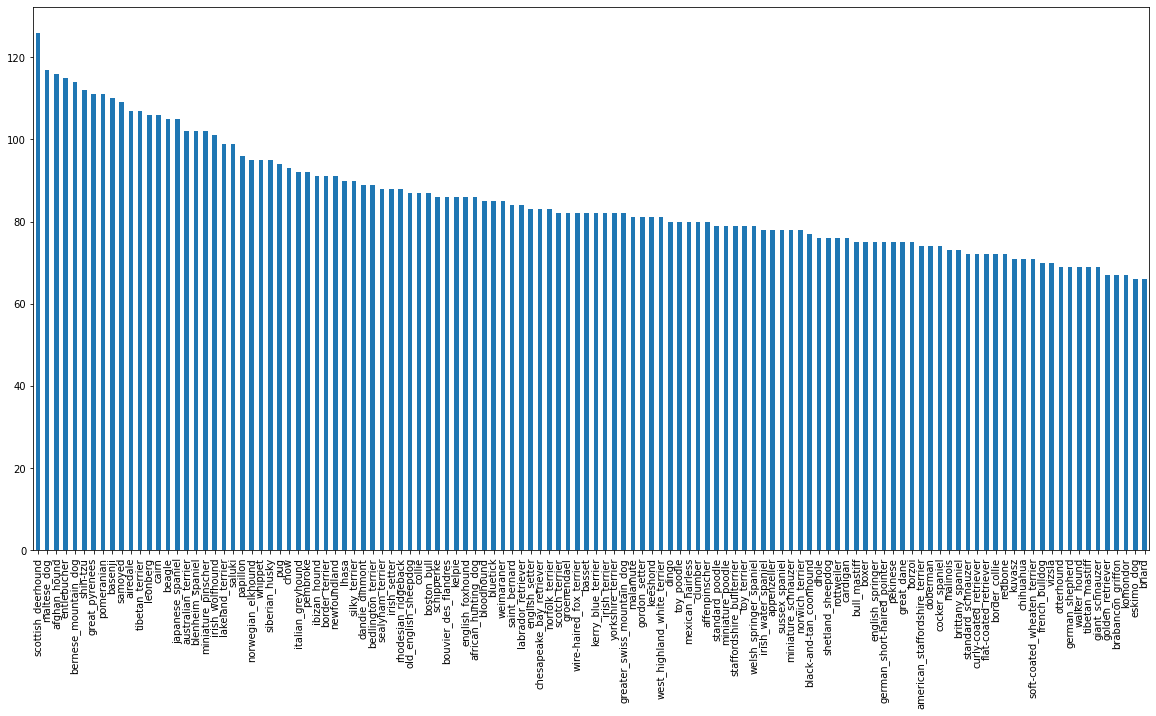

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

In [ ]:
from IPython.display import Image
# Image('drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

In [ ]:
filename = ['drive/MyDrive/Dog Vision/train/'+fname+'.jpg' for fname in labels_csv['id']]
filename[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
os.listdir('drive/MyDrive/Dog Vision/train')[:10]

['e78ff6b0a2d3a58234760d45e984eccf.jpg',
 'e2e10aeca2bcd6e9d9d91cd64efc13a8.jpg',
 'e827550ea6ab19bbd4916d9952ee8765.jpg',
 'dd79ba1404da7aa15471494d11657b68.jpg',
 'dcf5b9d3ab80c6829b10d20b72b67746.jpg',
 'e3aa1999ea72d13102a3810d312b49ba.jpg',
 'df2b16112524fe0c873530ac2357368c.jpg',
 'e904a004a53aab0ff5902239f538afe1.jpg',
 'ded35f1917f66ed6cb3179e163406aec.jpg',
 'dee5db7f0834ca1db80615a9d5fb6334.jpg']

In [ ]:
if len(os.listdir('drive/MyDrive/Dog Vision/train/')) == len(filename):
  print('Filenames matches actual amount of files!! Proceed.')
else:
  print('Filename does not match actual amount of files, please check the target directory before proceeding')

Filenames matches actual amount of files!! Proceed.


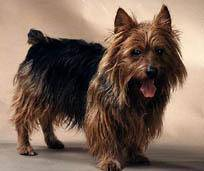

In [ ]:
Image(filename[5621])

In [ ]:
labels_csv['breed'][5621]

'australian_terrier'

In [ ]:
labels = labels_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels) == len(filename):
  print('Number of labels matches number of filename')
else:
  print('Number of labels does not match number of filename, check data directories')

Number of labels matches number of filename


In [ ]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
boolean_labels = [labels == unique_breeds for labels in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

Example: Turning boolean array into numbers

In [ ]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Creating own validation set




(Since the dataset from kaggle doesnt come with a validation set)

In [ ]:
X = filename
y = boolean_labels

first experimenting with ~1000 images and increase as needed

In [ ]:
NUM_IMAGES = 1000 #@param {type:'slider',min:1000, max:10000,step:1000}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
X_train[:5]

['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [ ]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

# Turning images into tensors


In [ ]:
# Converting image into tensors

from matplotlib.pyplot import imread

image = imread(filename[100])
image.shape

(500, 500, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 1,  0,  0],
        [26, 25, 23],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [10, 10,  8],
        [ 7,  7,  5]],

       [[ 1,  0,  0],
        [11, 10,  8],
        [15, 14, 12],
        ...,
        [15, 15, 13],
        [ 0,  0,  0],
        [ 9,  9,  7]]], dtype=uint8)>

In [ ]:
# Creating a function for preprocessing image

IMG_SIZE = 224
def process_image(image_path, img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

# Turn data into batches
*Creating a simple funciton to return a tuple*

In [ ]:
# Creating a function to return a tuple

def get_image_label(image_path, labels):
  image = process_image(image_path)
  return image, labels


In [ ]:
#(process_image(X[100]), tf.constant(y[100]))

In [ ]:
# Creating a function to turn data into batches
BATCH_SIZE = 32
def create_data_batches(X,y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    print('Completed.')
    print('')
    return data_batch
  
  elif valid_data:
    print('Creatinh validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    print('COmpleted')
    print('')
    return data_batch

  else:
    print('Creating training data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    print('Completed')
    print('')
    return data_batch


In [ ]:
# Creating training and validation dataset

train_data = create_data_batches(X_train, y_train)

Creating training data batches...
Completed



In [ ]:
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creatinh validation data batches...
COmpleted



In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis('off')

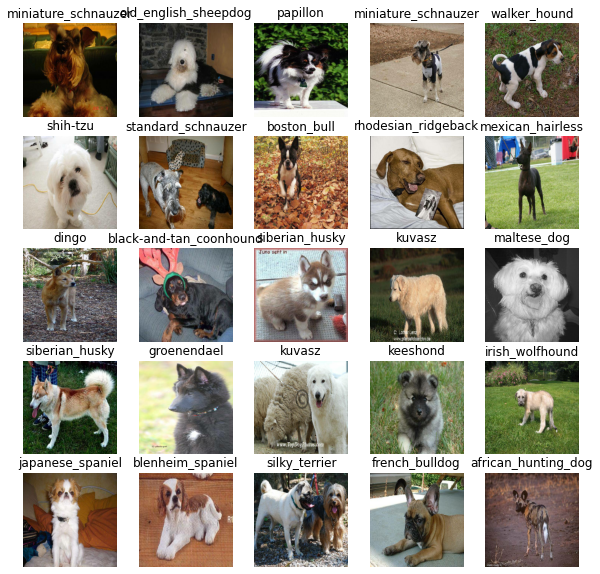

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

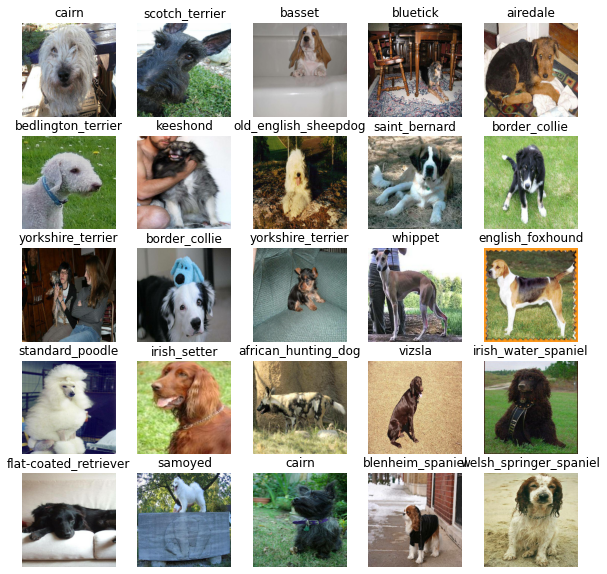

In [ ]:
# visualizing our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building the model

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [ ]:
# creating a function which will build a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation='softmax')
  ])
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  model.build(INPUT_SHAPE)
  return model

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
def create_tensorboard_callback():
  logdir = os.path.join('drive/MyDrive/Dog Vision/logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [ ]:
NUM_EPOCHS = 100 #@param{type:'slider', min:10, max:100, step:10}

In [ ]:
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,
            validation_data=val_data,
            validation_freq = 1,
            epochs = NUM_EPOCHS,
            callbacks = [tensorboard, early_stopping])
  return model

In [ ]:
model = train_model()

Epoch 1/100
25/25 [==============================] - 113s 4s/step - loss: 4.4179 - accuracy: 0.1150 - val_loss: 3.3393 - val_accuracy: 0.2800
Epoch 2/100
25/25 [==============================] - 4s 153ms/step - loss: 1.5648 - accuracy: 0.7088 - val_loss: 2.1152 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 3s 128ms/step - loss: 0.5428 - accuracy: 0.9400 - val_loss: 1.6640 - val_accuracy: 0.5650
Epoch 4/100
25/25 [==============================] - 4s 172ms/step - loss: 0.2485 - accuracy: 0.9837 - val_loss: 1.4725 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 4s 158ms/step - loss: 0.1441 - accuracy: 0.9962 - val_loss: 1.4161 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 3s 134ms/step - loss: 0.1000 - accuracy: 0.9987 - val_loss: 1.3700 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================] - 4s 158ms/step - loss: 0.0755 - accuracy: 1.0000 - val_loss: 1.3517 - val_accuracy: 0.6400


In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

In [ ]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 106ms/step


array([[2.28576409e-03, 1.42101970e-04, 1.97077934e-02, ...,
        2.84517859e-03, 1.34557340e-05, 1.81064277e-03],
       [3.71314876e-04, 1.28907990e-03, 1.07344352e-02, ...,
        3.43823835e-04, 2.01117131e-03, 1.04866100e-04],
       [1.26771174e-05, 1.24606260e-04, 1.65325946e-05, ...,
        2.93219618e-05, 1.96588171e-05, 1.50686916e-04],
       ...,
       [2.18567652e-06, 6.88745149e-06, 1.64579513e-04, ...,
        1.70640328e-06, 7.05687034e-06, 3.19559877e-05],
       [1.07830029e-03, 5.31117432e-04, 1.49527230e-04, ...,
        1.45273385e-04, 5.85324779e-05, 1.44563345e-02],
       [2.72345555e-04, 5.73237458e-06, 8.50029464e-04, ...,
        3.99842858e-03, 3.30407609e-04, 6.36007244e-05]], dtype=float32)

In [ ]:
index = 52
print(predictions[0])
print(f'Max value (Probability of predictions): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted label: {unique_breeds[np.argmax(predictions[index])]}')

[2.28576409e-03 1.42101970e-04 1.97077934e-02 7.97951143e-05
 3.11564916e-04 4.90256461e-05 3.38855349e-02 8.12002516e-04
 9.57019147e-05 1.57161499e-03 1.11836998e-03 9.77439995e-05
 4.69038525e-04 1.86187128e-04 2.36278269e-04 1.93267784e-04
 2.52395635e-04 1.75899699e-01 2.33793958e-06 2.03960124e-04
 2.42806156e-04 5.11215709e-04 2.86988034e-05 6.56240969e-04
 1.43723619e-05 1.28409476e-04 2.85505772e-01 4.99873968e-05
 2.77400046e-04 2.89097574e-04 6.63887113e-05 6.73226023e-04
 3.18075909e-04 5.73631587e-05 1.49740474e-04 3.57044600e-02
 8.09225276e-06 5.52464568e-04 2.10973143e-04 1.18975353e-04
 6.40121521e-04 5.92184988e-05 1.75677371e-04 2.66227347e-04
 2.49669338e-05 1.18937918e-04 1.25918668e-04 3.69561400e-04
 6.81230391e-04 5.42388116e-05 3.51738781e-05 4.96363427e-05
 9.93810478e-04 9.92699788e-05 7.68782629e-05 3.24065077e-05
 2.01190310e-03 4.88277664e-03 1.36219780e-03 5.09266555e-02
 1.03094142e-04 3.37246347e-05 2.39794934e-03 4.51527012e-05
 2.06971396e-04 2.536674

In [ ]:
# Function to get the pred labels
def get_pred_label(pred_prob):
  return unique_breeds[np.argmax(pred_prob)]

In [ ]:
pred_label = get_pred_label(predictions[45])

In [ ]:
pred_label

'groenendael'

In [ ]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Since validation dataset is in a batch dataset, we have to unbatch it to make predicitons on the validation images
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [ ]:
val_images, val_labels = unbatchify(val_data)

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.title(f'{pred_label} {np.max(pred_prob)*100:.2f}% {true_label}',
            color= color)

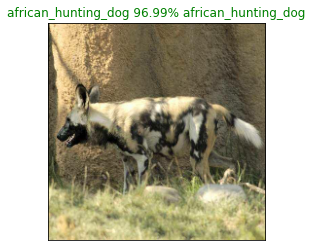

In [ ]:
plot_pred(prediction_probabilities=predictions, labels= val_labels, images = val_images,
          n=17)

**bold text**## Plotting top 10 predictions

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)

  top_10_indexes = pred_prob.argsort()[::-1][:10]
  top_10_values = pred_prob[top_10_indexes]
  top_10_labels = unique_breeds[top_10_indexes]

  top_plot = plt.bar(np.arange(len(top_10_labels)),
                   top_10_values,
                   color = 'grey')
  plt.xticks(np.arange(len(top_10_labels)),
           labels = top_10_labels,
           rotation='vertical')
  if np.isin(true_label, top_10_labels):
    top_plot[np.argmax(top_10_labels == true_label)].set_color('lightgreen')
  else:
    pass

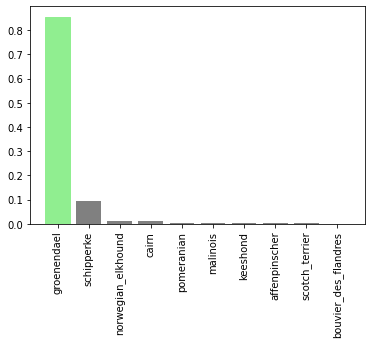

In [ ]:
plot_pred_conf(prediction_probabilities=predictions, labels = val_labels, n=77)

*Now* combining the above Two functions `plot_pred` & `plot_pred_conf` into a function

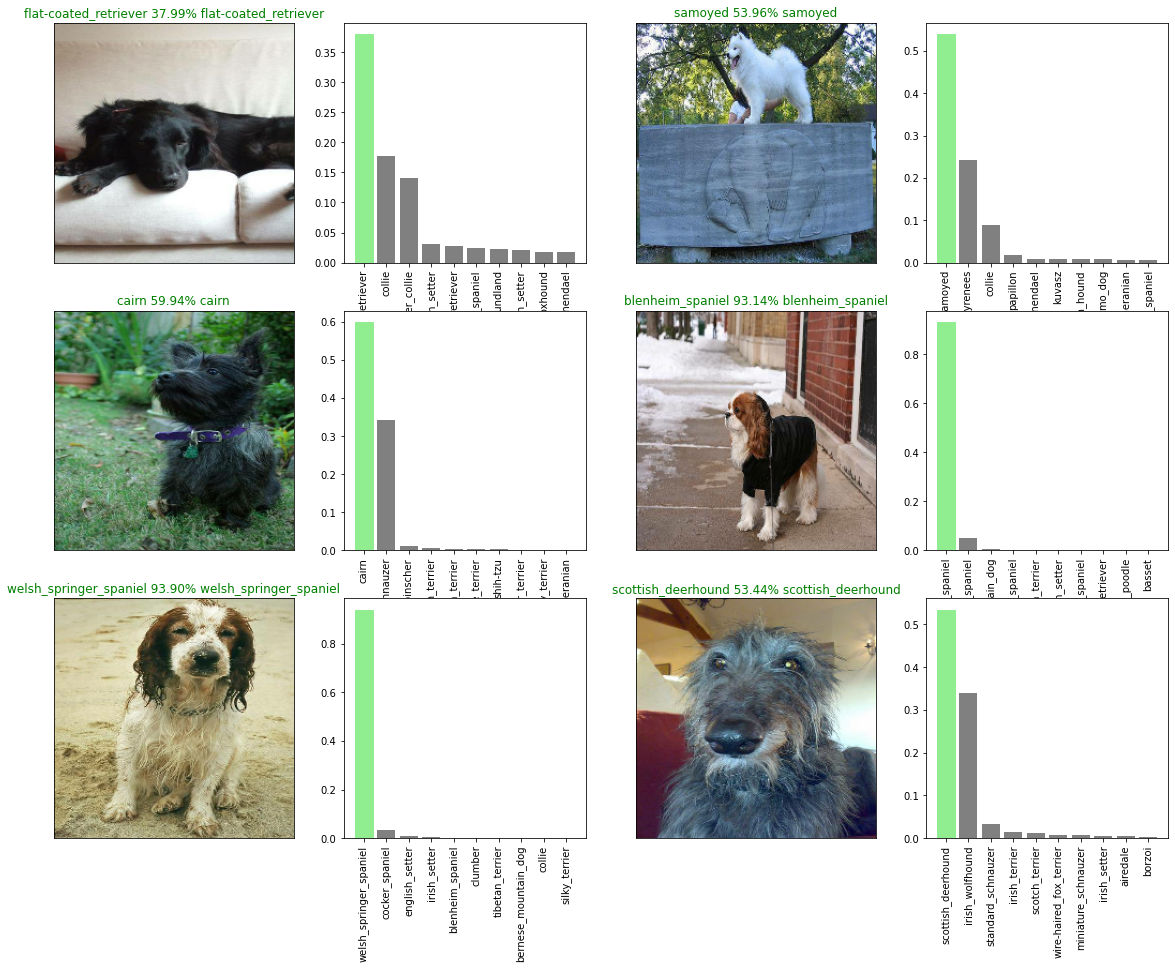

In [ ]:
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities = predictions,
            labels = val_labels,
            images = val_images,
            n= i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels = val_labels,
                 n = i+i_multiplier)

## Saving and reloading the trained model




### Saving

In [ ]:
# Function to save a model
def save_model(model, suffix=None):
  modeldir = os.path.join('drive/MyDrive/Dog Vision/models',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  model_path = modeldir + '_' + suffix + '.h5'
  print(f'Saving model to: {model_path}')
  model.save(model_path)
  print('Model saved in Memory')
  return model_path

In [ ]:
save_model(model, suffix='1000-images-mobilenetv2-Adam')

Saving model to: drive/MyDrive/Dog Vision/models/20220719-083709_1000-images-mobilenetv2-Adam.h5
Model saved in Memory


'drive/MyDrive/Dog Vision/models/20220719-083709_1000-images-mobilenetv2-Adam.h5'

### Loading

In [ ]:
def load_model(model_path):
  print(f'Loading saved model from: {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {'KerasLayer':hub.KerasLayer})
  print('Model has been successfully loaded to Notebook')
  return model

In [ ]:
loaded_1000_image_model = load_model('drive/MyDrive/Dog Vision/models/20210916-064851_1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Vision/models/20210916-064851_1000-images-mobilenetv2-Adam.h5
Model has been successfully loaded to Notebook


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 85ms/step - loss: 1.2786 - accuracy: 0.6600


[1.2786238193511963, 0.6600000262260437]

In [ ]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 85ms/step - loss: 1.3114 - accuracy: 0.6250


[1.311390995979309, 0.625]

## Training big dog model

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(X,y)

Creating training data batches...
Completed



In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model = create_model()

In [ ]:
full_model_tensorboard_callback = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                             patience = 3)

# Fitting the model

In [ ]:
full_model.fit(x=full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard_callback, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 1081s 3s/step - loss: 1.3368 - accuracy: 0.6668
Epoch 2/100
320/320 [==============================] - 37s 114ms/step - loss: 0.3975 - accuracy: 0.8820
Epoch 3/100
320/320 [==============================] - 37s 114ms/step - loss: 0.2332 - accuracy: 0.9362
Epoch 4/100
320/320 [==============================] - 38s 118ms/step - loss: 0.1526 - accuracy: 0.9631
Epoch 5/100
320/320 [==============================] - 37s 116ms/step - loss: 0.1072 - accuracy: 0.9783
Epoch 6/100
320/320 [==============================] - 37s 117ms/step - loss: 0.0763 - accuracy: 0.9865
Epoch 7/100
320/320 [==============================] - 40s 125ms/step - loss: 0.0592 - accuracy: 0.9928
Epoch 8/100
320/320 [==============================] - 38s 119ms/step - loss: 0.0468 - accuracy: 0.9945
Epoch 9/100
320/320 [==============================] - 37s 116ms/step - loss: 0.0371 - accuracy: 0.9954
Epoch 10/100
320/320 [==============================] - 37s 116ms

In [ ]:
save_model(full_model, suffix = 'full-image-set-mobilenetv2-Adam')

Saving model to: drive/MyDrive/Dog Vision/models/20220719-091223_full-image-set-mobilenetv2-Adam.h5
Model saved in Memory


'drive/MyDrive/Dog Vision/models/20220719-091223_full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model('drive/MyDrive/Dog Vision/models/20210913-061005_full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Vision/models/20210913-061005_full-image-set-mobilenetv2-Adam.h5
Model has been successfully loaded to Notebook


## Making predicitions on the test dataset

In [ ]:
test_path = 'drive/MyDrive/Dog Vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/e0f9b92adbba451d296678f466732969.jpg',
 'drive/MyDrive/Dog Vision/test/e0165801e47527205e45295aba441972.jpg',
 'drive/MyDrive/Dog Vision/test/e1ada9b155a5903bc6475255d012f681.jpg',
 'drive/MyDrive/Dog Vision/test/e24b2d063b3ad699d5eba7a01e4ae956.jpg',
 'drive/MyDrive/Dog Vision/test/dfac7db18136057f5d1730c0055f875c.jpg',
 'drive/MyDrive/Dog Vision/test/ddf0164ab3a269b179051bdecaea34b0.jpg',
 'drive/MyDrive/Dog Vision/test/dd7fbb397a4968d9ae54d1d7b7a35ae6.jpg',
 'drive/MyDrive/Dog Vision/test/e699b20911a55abda3558c5bcd37443d.jpg',
 'drive/MyDrive/Dog Vision/test/e3982348ad8b974cef2298f741bc3c99.jpg',
 'drive/MyDrive/Dog Vision/test/e381c5fcf1420985b20117e4bc7d38cd.jpg']

In [ ]:
## Creating test data batches

test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...
Completed.



Do NoT Run the below cell (we have already saved the test predictions before)

In [ ]:
test_predictions = loaded_full_model.predict(test_data, 
                                             verbose=1)

324/324 [==============================] - 158s 477ms/step


In [ ]:
np.savetxt('drive/MyDrive/Dog Vision/preds_array.csv', test_predictions, delimiter=',')

In [ ]:
test_predicitions = np.loadtxt('drive/MyDrive/Dog Vision/preds_array.csv', delimiter=',')

In [ ]:
test_predicitions[:10]

array([[5.08327069e-09, 4.59524346e-13, 1.85891424e-09, ...,
        8.83108100e-07, 2.53542936e-07, 9.83246151e-10],
       [1.14501759e-08, 1.53710489e-09, 1.40887924e-08, ...,
        1.28822985e-05, 5.44179805e-11, 1.46968632e-10],
       [4.97358741e-08, 1.73885961e-10, 5.93288981e-13, ...,
        1.18446780e-10, 3.92370246e-04, 5.46153751e-06],
       ...,
       [4.80684373e-12, 9.88668244e-11, 1.37729428e-08, ...,
        1.50857673e-07, 1.87264220e-07, 2.96215656e-08],
       [1.13027428e-10, 2.80285545e-10, 8.49239115e-08, ...,
        3.55709046e-10, 1.92107885e-09, 8.62868674e-08],
       [3.07598500e-12, 2.23253755e-05, 9.78400833e-11, ...,
        2.80727527e-05, 5.80424020e-09, 9.37470119e-08]])

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids

In [ ]:
preds_df.head()

id affenpinscher afghan_hound  \
0  e0f9b92adbba451d296678f466732969           NaN          NaN   
1  e0165801e47527205e45295aba441972           NaN          NaN   
2  e1ada9b155a5903bc6475255d012f681           NaN          NaN   
3  e24b2d063b3ad699d5eba7a01e4ae956           NaN          NaN   
4  dfac7db18136057f5d1730c0055f875c           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
preds_df[list(unique_breeds)] = test_predictions

In [ ]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e0f9b92adbba451d296678f466732969   5.083271e-09  4.595243e-13   
1  e0165801e47527205e45295aba441972   1.145018e-08  1.537105e-09   
2  e1ada9b155a5903bc6475255d012f681   4.973587e-08  1.738860e-10   
3  e24b2d063b3ad699d5eba7a01e4ae956   4.844157e-09  1.239544e-06   
4  dfac7db18136057f5d1730c0055f875c   4.357458e-13  2.220882e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.858914e-09  4.990129e-12                    9.592093e-07   
1         1.408879e-08  4.002686e-07                    6.837070e-05   
2         5.932890e-13  2.505403e-08                    1.816373e-09   
3         1.486403e-06  1.516655e-07                    2.141238e-07   
4         1.234860e-10  3.223094e-07                    5.134957e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.351595e-06        1.781947e-05  9.949319e-01  7.343740e-09  ...   
1  9.240586e-10        1.813169e-07  6.077036e-06  2.648537e-07  ...   
2  3.108207e-13        3.584979e-08  2.058828e-09  1.599859e-08  ...   
3  7.200087e-10        5.798679e-06  2.053140e-10  6.989407e-10  ...   
4  5.243525e-11        4.951064e-10  4.289883e-10  4.690375e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  6.840642e-07  3.096116e-03  7.332630e-08  2.113281e-05  2.013814e-09   
1  3.456414e-10  5.058734e-09  2.086751e-06  8.579271e-09  2.015125e-09   
2  1.033924e-08  8.499608e-09  1.309810e-08  1.345220e-06  1.865838e-09   
3  2.418964e-10  8.247441e-12  2.280993e-09  9.569144e-08  1.211558e-07   
4  4.854188e-11  1.290482e-09  5.273783e-05  3.233969e-07  1.073997e-10   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.732306e-08                 3.518451e-07  8.831081e-07   
1            1.969766e-10                 1.265730e-12  1.288230e-05   
2            1.670093e-10                 3.572581e-09  1.184468e-10   
3            7.240710e-11                 6.512607e-10  9.980324e-07   
4            6.843662e-11                 9.918595e-14  3.498772e-09   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.535429e-07       9.832462e-10  
1             5.441798e-11       1.469686e-10  
2             3.923702e-04       5.461538e-06  
3             1.550856e-05       5.821843e-09  
4             5.181540e-10       1.584899e-10  

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv('drive/MyDrive/Dog Vision/full_model_predictions_submission_1_mobilenetv2.csv',
                index=False)

# Predictions on Custom Dog Images

In [ ]:
custom_path = 'drive/MyDrive/Dog Vision/my-dog-photos/'
custom_images_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_images_path

['drive/MyDrive/Dog Vision/my-dog-photos/borzoi1.jpg',
 'drive/MyDrive/Dog Vision/my-dog-photos/borzoi2.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/tibetanmastif1.jpg',
 'drive/MyDrive/Dog Vision/my-dog-photos/chowchow1.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/mix.jpg',
 'drive/MyDrive/Dog Vision/my-dog-photos/alaskanMalamute.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/beagle.jpeg',
 'drive/MyDrive/Dog Vision/my-dog-photos/Doberman Pinscher.jpeg']

In [ ]:
custom_data = create_data_batches(custom_images_path, test_data=True)
custom_data

Creating test data batches...
Completed.



<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

(8, 120)

In [ ]:
custom_preds_label = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_label

['borzoi',
 'borzoi',
 'tibetan_mastiff',
 'chow',
 'miniature_poodle',
 'siberian_husky',
 'beagle',
 'doberman']

In [ ]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

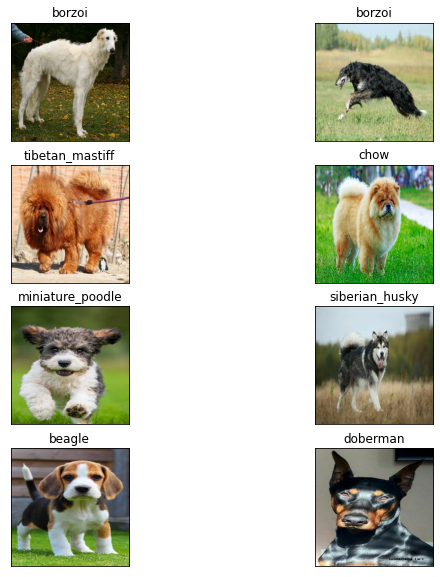

In [ ]:
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(4,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_label[i])
  plt.imshow(image)

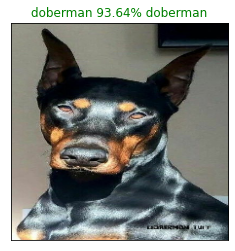

In [ ]:
plot_pred(prediction_probabilities= custom_preds,
          labels= custom_preds_label,
          images = custom_images,
          n=7
          )

In [ ]:
len(custom_preds)

8

In [ ]:
def plot_custom_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, image = prediction_probabilities[n], images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  plt.title(f'{pred_label} {np.max(pred_prob)*100:2.0f}%')


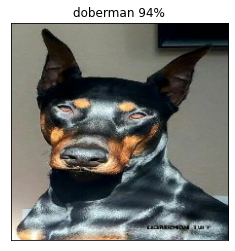

In [ ]:
plot_custom_pred(prediction_probabilities= custom_preds,
          labels= custom_preds_label,
          images = custom_images,
          n=7
          )

In [ ]:
def plot_custom_conf(prediction_probabilities,labels,n=7):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)

  top_10_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_indexes]
  top_10_pred_labels = unique_breeds[top_10_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation='vertical')
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color('lightgreen')
  else:
    pass

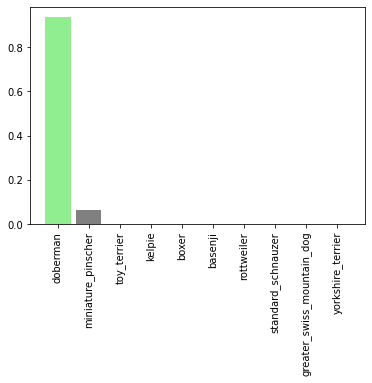

In [ ]:
plot_custom_conf(prediction_probabilities=custom_preds,
                 labels = custom_preds_label
                 )

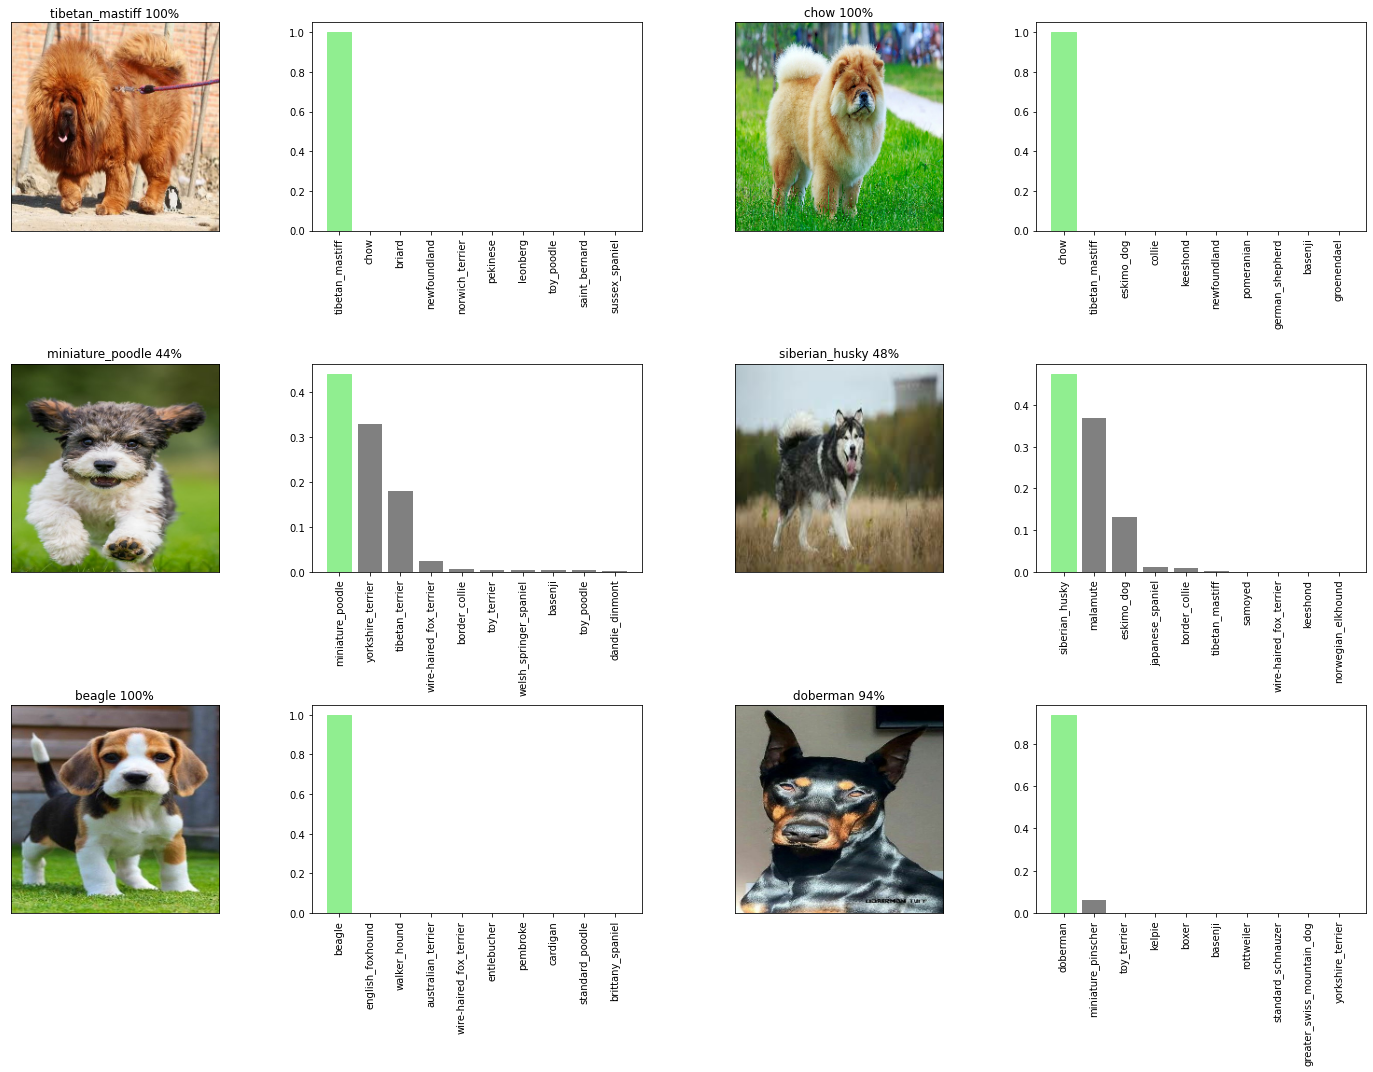

In [ ]:
i_multiplier = 2
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_custom_pred(prediction_probabilities=custom_preds,
                   labels = custom_preds_label,
                   images = custom_images,
                   n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_custom_conf(prediction_probabilities=custom_preds,
                   labels = custom_preds_label,
                   n = i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()